<a href="https://colab.research.google.com/github/nidhi-sin-gh/iris-flower-classification-using-knn/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER CLASSIFICATION

The Iris Flower Classification problem is a classic machine learning problem that involves classifying Iris flowers into one of three categories based on their sepal length, sepal width, petal length, and petal width.

### DOWNLOADING DATASET


In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/saurabh00007/iriscsv'

In [ ]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nsnidhi
Your Kaggle Key: ········


100%|██████████| 1.28k/1.28k [00:00<00:00, 336kB/s]

In [ ]:
data_dir = './iriscsv'

In [ ]:
import os
os.listdir(data_dir)

['Iris.csv']

In [ ]:
import pandas as pd
iris_raw_df = pd.read_csv('iriscsv/Iris.csv')

In [ ]:
iris_raw_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The Iris dataset consists of 150 instances with 3 classes, where each class represents a type of Iris flower. The features of the dataset include sepal length, sepal width, petal length, and petal width.

### DATA PREPARATION AND CLEANING

In [ ]:
iris_raw_df.shape

(150, 6)

In [ ]:
iris_raw_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_raw_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris_raw_df.Species.nunique()

3

In [ ]:
iris_raw_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_raw_df.rename(columns = {'SepalLengthCm':'sepal_length',
                              'SepalWidthCm':'sepal_width', 
                              'PetalLengthCm':'petal_length', 
                              'PetalWidthCm':'petal_width',
                              'Species':'species'},
                  inplace = True)

In [ ]:
iris_df = iris_raw_df.drop(['Id'], axis = 1)

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### EXPLORATORY ANALYSIS AND VISUALIZATION



In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**BAR GRAPH**

In [ ]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
colors = sns.color_palette("mako")

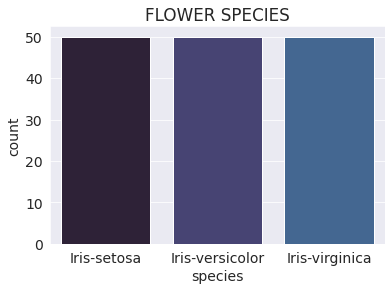

In [ ]:
plt.figure(figsize=(6,4))
plt.title("FLOWER SPECIES")
sns.countplot(data = iris_df , x = 'species' , palette = colors );

**SCATTER PLOT**

In [ ]:
colors_1 = ['#35193e', '#e13342',  '#f6b48f']

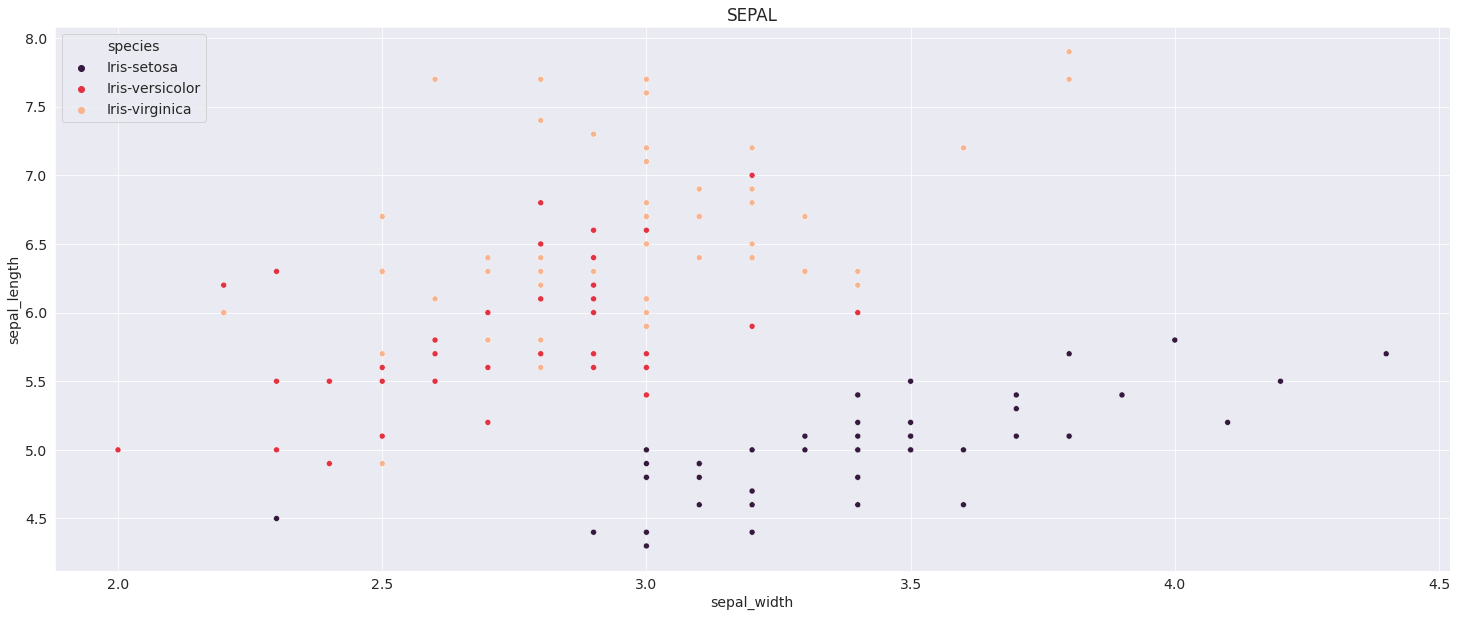

In [ ]:
plt.figure(figsize=(25,10))
plt.title("SEPAL")
sns.scatterplot(data = iris_df , x = 'sepal_width', y = 'sepal_length' , hue = 'species' , palette = colors_1)
plt.legend(loc='upper left' , title = 'species');

### CLASSIFICATION MODEL

- Training the machine learning model for the task of classifying iris species. 
- We will first split the data into training and test sets, and then use the KNN classification algorithm to train the iris classification model.

**FOR THE CLASSIFICATION WE WILL BE USING KNN ALGORITHM**

K-Nearest Neighbors (KNN) is a simple machine learning algorithm used for classification and regression tasks. The algorithm is based on the principle that similar instances are close to each other in the feature space. The KNN algorithm works by finding the k number of nearest points based on the distance metric and assigns the class label based on the majority of the k neighbors. The distance metric used to find the nearest neighbors can be Euclidean distance, Manhattan distance, Minkowski distance, etc.

In the case of the Iris Flower Classification problem, the KNN algorithm is used to find the k nearest neighbors of a new Iris flower based on its sepal length, sepal width, petal length, and petal width. The algorithm finds the k nearest neighbors based on the distance metric and assigns the class label based on the majority of the k neighbors.

KNN is a non-parametric algorithm, which means it doesn't make any assumptions about the underlying distribution of the data. It's also an instance-based learning algorithm, which means it memorizes the training dataset instead of learning a function that maps the input to the output.

In [ ]:
import numpy as np

Importing numpy library as we will take numpy array input.

In [ ]:
x = iris_df.drop("species", axis=1)

- This line drops the "species" column from the iris dataset using the drop method.
- The axis=1 argument specifies that we want to drop a column, not a row.
- The resulting DataFrame without the "species" column is stored in the variable x.


In [ ]:
y = iris_df["species"]

- This line assigns the "species" Column of the iris dataset to the variable y.


In [ ]:
from sklearn.model_selection import train_test_split

- This line imports the train_test_split function from the sklearn.model_selection library.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- This line uses the train_test_split function to split the x and y into training and testing sets.
- The test_size argument specifies the proportion of the data to be used for testing. Here, it's set to 0.2, which means 20% of the data will be used for testing.
- The random_state argument is used to ensure that the same split is generated every time the code is run.
- The resulting training and testing sets are assigned to x_train, x_test, y_train, and y_test, respectively.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

- This line imports the KNeighborsClassifier class from the sklearn.neighbors library.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

- This line creates an instance of the KNeighborsClassifier class with n_neighbors=1, meaning it will only consider the closest neighbor when making predictions.
- The resulting instance is assigned to the variable knn.

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

- This line fits the classifier to the training data, so it learns to make predictions based on the input features and the corresponding output labels x_train and y_train.

**Giving set of measurements of the iris flower input and using the model to predict the iris species**

In [ ]:
x_new = np.array([[5, 2.9, 1, 0.2]])

- This line creates a new NumPy array containing the input features for a new iris flower we want to classify.
- Here, we have only one flower with four features: sepal length = 5, sepal width = 2.9, petal length = 1, and petal width = 0.2, enclosed in a list within another list.
- The resulting NumPy array is assigned to the variable x_new.

In [ ]:
prediction = knn.predict(x_new)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


- This line uses the predict method of the KNeighborsClassifier instance knn to classify the new iris flower.
- The input to the predict method is the NumPy array x_new containing the input features of the new iris flower.
- The resulting prediction is assigned to the variable prediction.


In [ ]:
prediction

array(['Iris-setosa'], dtype=object)

- This line gives the predicted species of the new iris flower to the console.
- The predicted species is inserted into the string using the format method and then printed to the console using the print method.

**CREATING FUNCTION FOR PREDICTION OF SPECIES**

In [ ]:
def predict_function(x):
    prediction = knn.predict(x)
    print(prediction)

In [ ]:
x_new_tester_1 = np.array([[5.9, 1.9, 3.8, 1.2]])

In [ ]:
predict_function(x_new_tester_1)

['Iris-versicolor']


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### CONCLUSION

The Iris Flower Classification problem is a well-known machine learning problem that involves classifying Iris flowers into one of three categories based on their features. The K-Nearest Neighbors (KNN) algorithm is a popular solution to this problem due to its simplicity and effectiveness.

By finding the k nearest neighbors based on a distance metric and assigning class labels based on the majority of the k neighbors, the KNN algorithm can accurately classify Iris flowers. It is also a non-parametric, instance-based learning algorithm that doesn't make any assumptions about the underlying distribution of the data.

Overall, the KNN algorithm is a great choice for beginners learning about machine learning. It is easy to implement and can handle non-linear data well. However, it may not perform well on high-dimensional data and can be computationally expensive for large datasets.